In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
import pickle
import time
from sklearn.decomposition import PCA
TOI =  pd.read_csv('TOI_2022.04.12_07.30.35.csv', skiprows = 73)
TOI = TOI.drop(labels = ['tid', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra', 'st_pmdec', 'toi_created', 'rowupdate'], axis =1 )
TOI = TOI.drop(['st_pmraerr1','st_pmraerr2', 'st_pmralim', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim'], axis = 1)
TOI = TOI.drop(['pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim','pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim'], axis = 1)
TOI = TOI.drop(['pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1','pl_eqterr2', 'pl_eqtlim'], axis = 1)
TOI = TOI[TOI.columns.drop(list(TOI.filter(regex='err2')))]
TOI = TOI[TOI.columns.drop(list(TOI.filter(regex='err1')))]
TOI = TOI[TOI.columns.drop(list(TOI.filter(regex='lim')))]
Renamedict=  {'toi': 'Planet Identification Number', 'tfopwg_disp': 'Object Type', 'pl_tranmid':'Time to reach midpoint of transit', 'pl_orbper': 'Orbital Period', 'pl_trandurh': 'Total Length of Transit (H)', 'pl_trandep' : 'Depth of Light Curve', 'pl_rade' : 'Planet Radius (in Earth Radii)', 'pl_insol': 'Amount of Solar Sunlight recieved (relative to Earth)', 'pl_eqt': 'Average Planet Temperature (K)', 'st_tmag' : 'Star Brightness', 'st_dist': 'Distance to Star', 'st_teff': 'Star Temperature', 'st_logg':'Gravity at star surface','st_rad': 'Star Radius'}
TOI = TOI.rename(Renamedict, axis = 1)
TOI

,Planet Identification Number,Object Type,Time to reach midpoint of transit,Orbital Period,Total Length of Transit (H),Depth of Light Curve,Planet Radius (in Earth Radii),Amount of Solar Sunlight recieved (relative to Earth),Average Planet Temperature (K),Star Brightness,Distance to Star,Star Temperature,Gravity at star surface,Star Radius
0,1097.02,PC,2.459344e+06,13.902839,2.126443,647.270104,2.613685,77.484188,756.698759,8.7215,79.5561,5876.0,4.48000,0.983215
1,4405.02,PC,2.459037e+06,1.092938,1.628862,379.868608,1.360729,458.236934,1180.027890,12.3813,155.5010,4361.0,4.59663,0.687025
2,772.02,PC,2.459314e+06,NaN,4.456935,4273.827679,5.298360,5.322014,387.381397,10.8815,135.3710,5184.0,4.57383,0.815374
3,790.02,PC,2.458345e+06,41.017478,7.956864,234.153711,2.321129,62.461834,717.007061,8.9914,167.2180,6988.0,4.25649,1.460800
4,2000.02,PC,2.459283e+06,3.098196,2.244660,413.966764,2.529297,692.332942,1308.273362,10.3579,175.7130,5400.0,4.43000,1.180930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,120.01,CP,2.458332e+06,11.535076,8.555958,2389.906160,12.215808,NaN,NaN,7.1062,79.5702,5479.3,3.77000,2.487710
5484,128.01,PC,2.459385e+06,4.940468,1.966000,340.000000,2.218980,182.406000,1023.000000,7.9849,68.4727,6086.0,4.26269,1.130000
5485,130.01,CP,2.459369e+06,14.339206,4.586820,398.599933,2.314492,118.753936,841.941183,7.4371,57.5846,6295.7,4.43800,1.137420
5486,137.01,FA,2.459199e+06,4.817380,1.323000,1800.000000,1.711370,33.919000,672.000000,10.7020,88.8838,4651.0,4.56937,0.690000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
TOI = TOI.drop(TOI.loc[TOI['Object Type']== 'APC'].index)
TOI = TOI.drop(TOI.loc[TOI['Object Type']== 'PC'].index)
TOI = TOI.replace(['CP', 'KP'], 1)
TOI = TOI.replace(['FA', 'FP'], 0)
TOI = TOI.replace([np.nan], 0)
TOI['Object Type'].value_counts() #We have a pretty even distibution of planets and non planets
TOI['Object Type'].value_counts()
features_train, features_test,type_train, type_test = train_test_split(TOI.drop(['Planet Identification Number', 'Object Type'], 1), TOI['Object Type'])
len(features_train)

1110

0.7466307277628033


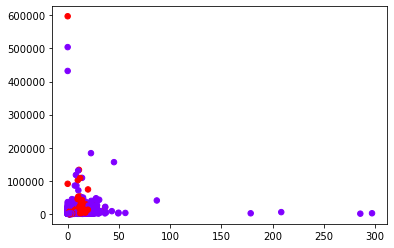

In [10]:
plt.scatter( TOI['Planet Radius (in Earth Radii)'], TOI['Depth of Light Curve'], c=TOI['Object Type'], s=30, cmap=plt.cm.rainbow);
fit = svm.SVC(kernel = 'linear')
fit.fit(features_train, type_train)
print(fit.score(features_test, type_test))




In [11]:
logit_model = sm.Logit(type_train, sm.add_constant(features_train))
result = logit_model.fit()
print(result.summary() )

Optimization terminated successfully.
         Current function value: 0.484905
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            Object Type   No. Observations:                 1110
Model:                          Logit   Df Residuals:                     1097
Method:                           MLE   Df Model:                           12
Date:                Thu, 21 Apr 2022   Pseudo R-squ.:                  0.2880
Time:                        12:10:01   Log-Likelihood:                -538.24
converged:                       True   LL-Null:                       -756.01
Covariance Type:            nonrobust   LLR p-value:                 1.110e-85
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                